In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [59]:
#loading data
data = pd.read_csv("../input/creditcardfraud/creditcard.csv")

In [60]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [61]:
data.isnull().any().any()

False

In [62]:
data.size

8829017

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [64]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [65]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Classes for Transactions')

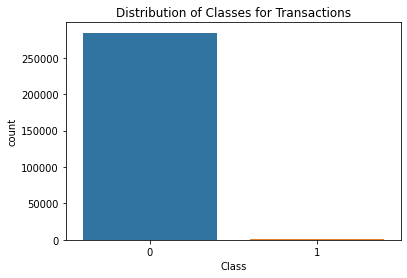

In [66]:
sns.countplot('Class', data = data)
plt.title("Distribution of Classes for Transactions")

We observe that fraud cases are very less as compared to normal cases, hence we have to train a model considering the nature of balanced dataset.

In [67]:
#Categorizing fraud and normal cases 
fraud = data[data['Class']== 1]
normal= data[data['Class'] == 0]

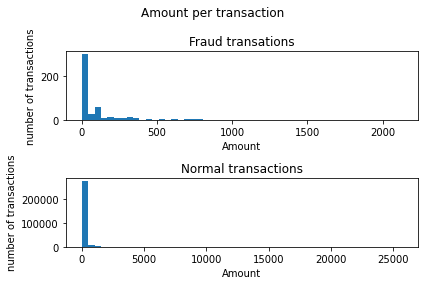

In [68]:
#Checking pattern of the amounds withdrawn for both classes
fig, ax = plt.subplots(2, 1)
plt.suptitle("Amount per transaction")
ax[0].hist(fraud["Amount"], histtype = "bar", bins = 50)
ax[0].set_title("Fraud transations")
ax[0].set_xlabel("Amount")
ax[0].set_ylabel("number of transactions")
ax[1].hist(normal["Amount"], histtype = "bar", bins = 50)
ax[1].set_xlabel("Amount")
ax[1].set_ylabel("number of transactions")
plt.title("Normal transactions")
plt.tight_layout()


From the above observation it is clear that, for fraud transactions,lesser amount than normal transactions has been withdrawn

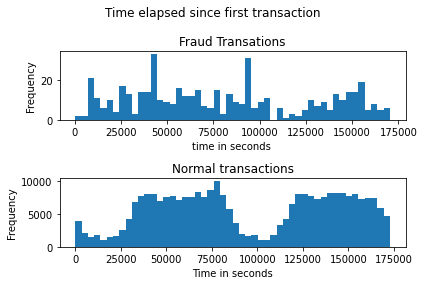

In [69]:
#Checking the pattern for occurance time for both classes
fig, ax = plt.subplots(2, 1)
plt.suptitle("Time elapsed since first transaction")
ax[0].hist(fraud["Time"], histtype = "bar", bins = 50)
ax[0].set_title("Fraud Transations")
ax[0].set_xlabel("time in seconds ")
ax[0].set_ylabel("Frequency")
ax[1].hist(normal["Time"], histtype = "bar", bins = 50)
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("Time in seconds")
plt.title("Normal transactions")
plt.tight_layout()

Above observation implies that fraud transactions do not usually happen and the chances of them occuring is far less than normal transactions that are far more consistent

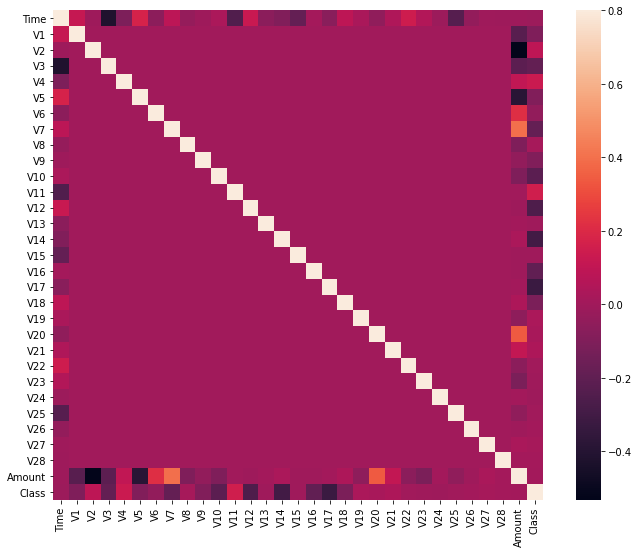

In [70]:
#Checking if features are correlated
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

The correlation matrix shows that most features are not really correlated so we will keep the features intact as they are all useful.

In [71]:
#categorizing feature and target array for training model 
X = data.drop("Class", axis = 1)
y = data["Class"]
print(X.shape, y.shape)

(284807, 30) (284807,)


In [72]:
xdata = X.values
ydata = y.values

In [73]:
#Training the model without resampling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100, random_state = 0)

In [74]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [75]:
y_pred=clf.predict(X_test)

In [76]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9994733330992591
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.95      0.75      0.84       103

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



That seems a pretty good accuracy but we seem to forget that this is a balanced dataset, that means even though the accuracy is high, still it's not a good reflection of the accuracy of our predictions because it majority cases are normal cases and even if it is not able to detect minority fraud cases,it will show very high accuracy. Therefore accuracy is not a good measure in this case.Recall is a better estimate here and we can see that recall for positive cases is low. Hence we will use the above model as baseline model and optimize it.

For optimizing recall we will use resampling techniques

In [77]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# Separate class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (284315, 31)
class 1: (492, 31)


total class of 1 and0: 0    492
1    492
Name: Class, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

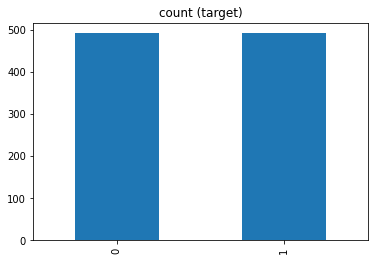

In [78]:
#undersampling
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['Class'].value_counts())# plot the count after under-sampeling
test_under['Class'].value_counts().plot(kind='bar', title='count (target)')

By performing undersampling we have equalized the size of both classes equal to the minority class.

total class of 1 and 0: 0    492
1    492
Name: Class, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

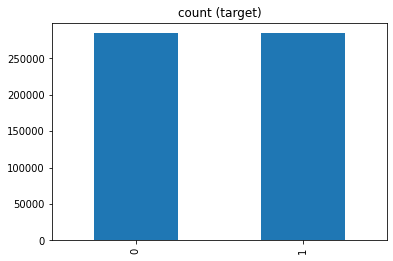

In [79]:
#Oversampling
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_under['Class'].value_counts())# plot the count after under-sampeling
test_over['Class'].value_counts().plot(kind='bar', title='count (target)')

By performing undersampling we have equalized the size of both classes equal to the majority class.

In [80]:
#Define feature array and target array
X= test_under.drop("Class", axis = 1)
y = test_under["Class"]
print(X.shape, y.shape)
X_under= X.values
y_under = y.values

(984, 30) (984,)


In [110]:
#spliting test data and train data 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2)
clf = RandomForestClassifier(n_estimators=25, random_state = 0)



In [111]:
#Fitting the model
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=0)

In [112]:
#predicting the labels 
y_pred = clf.predict(X_test)

In [113]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9390862944162437
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       102
           1       0.99      0.88      0.93        95

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



All metrics have greately improved after undersampling.


In [96]:
print(y_test.shape, y_pred.shape)

(197,) (197,)


<AxesSubplot:>

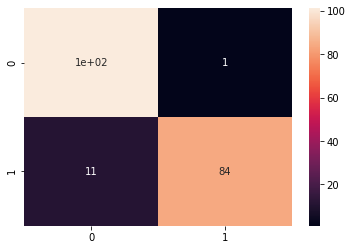

In [114]:
sns.heatmap(metrics.confusion_matrix( y_test, y_pred), annot = True )

[0.         0.00980392 1.        ] [0.         0.88421053 1.        ] [2 1 0]
No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.937


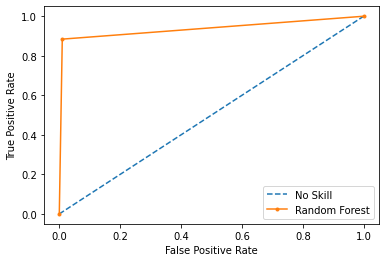

In [115]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr, tpr, thresholds)
ns_probs = [0 for _ in range(len(y_test))]
rf_probs = y_pred
rf_auc = roc_auc_score(y_test, rf_probs)
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


We have got a good enough ROC AUC score of 0.937.

Accuracy: 0.8527918781725888
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       102
           1       1.00      0.69      0.82        95

    accuracy                           0.85       197
   macro avg       0.89      0.85      0.85       197
weighted avg       0.89      0.85      0.85       197



<AxesSubplot:>

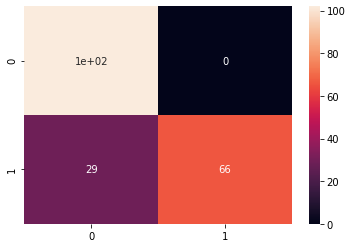

In [130]:
#Train Naive Bayes Model
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(metrics.confusion_matrix( y_test, y_pred), annot = True )

[0. 0. 1.] [0.         0.69473684 1.        ] [2 1 0]
No Skill: ROC AUC=0.500
GaussianNB: ROC AUC=0.847


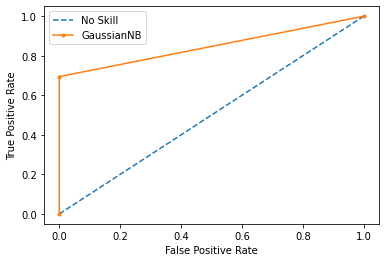

In [131]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr, tpr, thresholds)
ns_probs = [0 for _ in range(len(y_test))]
model_probs = y_pred
model_auc = roc_auc_score(y_test, model_probs)
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('GaussianNB: ROC AUC=%.3f' % (model_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='GaussianNB')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:53:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9289340101522843
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       102
           1       0.97      0.88      0.92        95

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



<AxesSubplot:>

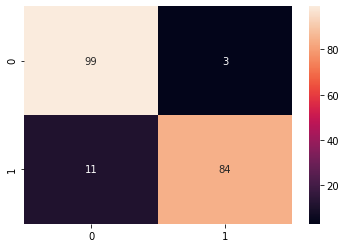

In [121]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(metrics.confusion_matrix( y_test, y_pred), annot = True )

[0.         0.02941176 1.        ] [0.         0.88421053 1.        ] [2 1 0]
No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.927


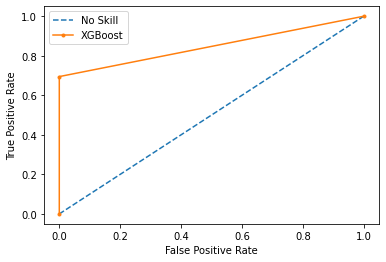

In [122]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr, tpr, thresholds)
ns_probs = [0 for _ in range(len(y_test))]
model_probs = y_pred
model_auc = roc_auc_score(y_test, model_probs)
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (model_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='XGBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Accuracy: 0.9289340101522843
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       102
           1       0.97      0.88      0.92        95

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



<AxesSubplot:>

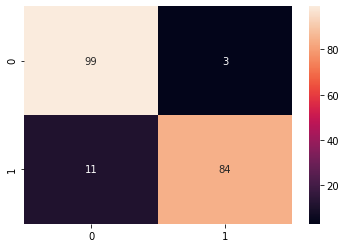

In [123]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(metrics.confusion_matrix( y_test, y_pred), annot = True )

[0.         0.02941176 1.        ] [0.         0.88421053 1.        ] [2 1 0]
No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.927


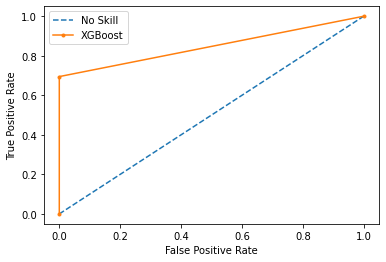

In [124]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr, tpr, thresholds)
ns_probs = [0 for _ in range(len(y_test))]
model_probs = y_pred
model_auc = roc_auc_score(y_test, model_probs)
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (model_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='XGBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Accuracy: 0.5583756345177665
              precision    recall  f1-score   support

           0       0.60      0.45      0.51       102
           1       0.53      0.67      0.60        95

    accuracy                           0.56       197
   macro avg       0.57      0.56      0.55       197
weighted avg       0.57      0.56      0.55       197



<AxesSubplot:>

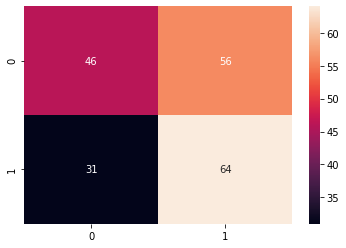

In [126]:
Model = SVC()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(metrics.confusion_matrix( y_test, y_pred), annot = True )

[0.         0.54901961 1.        ] [0.         0.67368421 1.        ] [2 1 0]
No Skill: ROC AUC=0.500
SVC: ROC AUC=0.562


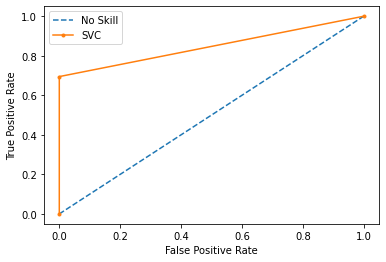

In [129]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr, tpr, thresholds)
ns_probs = [0 for _ in range(len(y_test))]
model_probs = y_pred
model_auc = roc_auc_score(y_test, model_probs)
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVC: ROC AUC=%.3f' % (model_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='SVC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

We have trained multiple models but the best ROC AUC score 0.937 and F1 score 93% is obtained by Randomforest Classifier. Such a model can prove to be very useful while discriminating fraud cases from normal cases.